In [ ]:
from dlhm import dlhm, dlhm_rec
from datasets import load_dataset
from PIL import Image
import numpy as np
import random, cv2, os
import pandas as pd
import matplotlib.pyplot as plt


#  Simulation parameters
size = 256
L = 6e-3  # Distance from the source to the hologram plane
z = 2e-3  # Distance from the source to the sample's plane
Mag = L / z
W_c = 4.71e-3  # Width of the sensor
dx_in = W_c / size
lambda_ = 532e-9  # Wavelength of the light
h_max = 350e-9


/home/spm061102/anaconda3/envs/TDG/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset generation with folders

In [ ]:
import os, cv2, random
import numpy as np
from dlhm import dlhm, dlhm_rec

size = 256
L = 6e-3  # Distance from the source to the hologram plane
z = 2e-3  # Distance from the source to the sample's plane
Mag = L / z
W_c = 4.71e-3  # Width of the sensor
dx_in = W_c / size
lambda_ = 532e-9  # Wavelength of the light
h_max = 350e-9

path_data = r'/home/spm061102/Documents/TDG/Raw dataset/test'
path_save = r'/home/spm061102/Documents/TDG/Dataset/test'


# Call the realistic_dlhm function to simulate digital lensless holograms
num_im = 10 # Number of images for de data set

count = 0
folders = os.listdir(f'{path_data}')

for i in range(len(folders)):
    data = os.listdir(f'{path_data}/{folders[i]}')
    for j in range(len(data)):
        #image = np.array(Image.open(f'{path}/{folders[i]}/{data[j]}').convert('L'), dtype=np.uint8)
        image = cv2.imread(f'{path_data}/{folders[i]}/{data[j]}', cv2.IMREAD_GRAYSCALE).astype(np.float32)/255
        image = cv2.resize(image, (size, size))

        sample = image*np.exp(1j * 2 * np.pi * image * random.uniform(0.2 , 0.6))
        holo = dlhm(sample, 0, L, z, W_c, dx_in, lambda_, x0=0, y0=0, NA_s=0)

        ph = np.angle(sample)
        ph = ((ph - np.min(ph)) / (np.max(ph) - np.min(ph)))
        amp = np.abs(sample)
        amp = ((amp - np.min(amp)) / (np.max(amp) - np.min(amp)))

        rec_am, rec_ph = dlhm_rec(holo, 0, L, z, W_c, dx_in, lambda_, x0=0, y0=0, NA_s=0.1)
        rec_ph = ((rec_ph - np.min(rec_ph)) / (np.max(rec_ph) - np.min(rec_ph)))
        


        cv2.imwrite(f'{path_save}/tar_ph/tar_ph{count}.png', ph*255)
        cv2.imwrite(f'{path_save}/tar_amp/tar_amp{count}.png', (amp*255)*0.5)
        cv2.imwrite(f'{path_save}/src/src{count}.png', rec_ph*255)
        count += 1

Dataset generation loaded from datasets library

In [ ]:
import cv2, random
import numpy as np
import matplotlib.pyplot as plt
from dlhm import dlhm, dlhm_rec
from datasets import load_dataset


size = 256
L = 6e-3  # Distance from the source to the hologram plane
z = 2e-3  # Distance from the source to the sample's plane
Mag = L / z
W_c = 4.71e-3  # Width of the sensor
dx_in = W_c / size
lambda_ = 532e-9  # Wavelength of the light
h_max = 350e-9

path_save = r'/home/spm061102/Documents/TDG/Dataset/trys'
ds = load_dataset("Norod78/microsoft-fluentui-emoji-512-whitebg", split= "train")


num_im = 10 # Number of images for de data set
for i in range(0, num_im):
    image = np.array(ds[i]['image'])
    image = np.array(image[:, :, 1]) / 255
    image = cv2.resize(image, (size, size))
    print(type(image))
    image[image == 1] = random.uniform(0,1)
    ## for Docty/Blood-Cells dataset and emojis

    ## for danjacobellis/cell_seg_labeled
    # image = (df['train']['image'][i])
    # image = np.array(image)
    # if np.array(image.shape).shape[0] == 3:
    #     image = (image[:,:,0] + image[:,:,1] + image[:,:,2]) / 3
    # image = cv.resize(image, (size, size))
    #
    # image = (image / image.max()) * 0.8

    sample = image*np.exp(1j * 2 * np.pi * image * random.uniform(0.2 , 0.6))

    holo = dlhm(sample, 0, L, z, W_c, dx_in, lambda_, x0=0, y0=0, NA_s=0)
    # complx_holo = holo + 1j * (random.uniform(0, 1))

    ph = np.angle(sample)
    ph = ((ph - np.min(ph)) / (np.max(ph) - np.min(ph)))
    amp = np.abs(sample)
    amp = ((amp - np.min(amp)) / (np.max(amp) - np.min(amp)))

    rec_am, rec_ph = dlhm_rec(holo, 0, L, z, W_c, dx_in, lambda_, x0=0, y0=0, NA_s=0.1)
    rec_ph = ((rec_ph - np.min(rec_ph)) / (np.max(rec_ph) - np.min(rec_ph)))

    cv2.imwrite(f'{path_save}/tar_ph/tar_ph{i}.png', ph*255)
    cv2.imwrite(f'{path_save}/tar_amp/tar_amp{i}.png', (amp*255)*0.5)
    cv2.imwrite(f'{path_save}/src/src{i}.png', rec_ph*255)

NameError: name 'load_dataset' is not defined

<class 'PIL.PngImagePlugin.PngImageFile'>
<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7DAE723042D0>


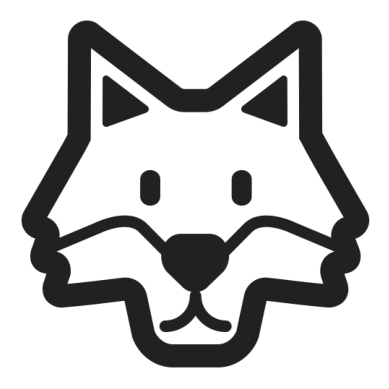

In [ ]:
from datasets import load_dataset
import matplotlib.pyplot as plt

#ds = load_dataset("valhalla/emoji-dataset", split="train")
ds = load_dataset("Norod78/microsoft-fluentui-emoji-512-whitebg", split= "train")



sample = ds[200]
print(type(sample['image']))  # e.g. "grinning face"
print(sample['image']) # returns a PIL.Image.Image object


# or using matplotlib
plt.imshow(sample['image'])
plt.axis('off')
plt.show()

Dataset mix

In [2]:
import os
from PIL import Image
import cv2

folders = ['Cancer blood cells', 'Rand figs']
percentage = [50, 50]
path = r'/home/spm061102/Documents/TDG/Dataset'
new_path = r'/home/spm061102/Documents/TDG/Dataset/Combined'
num_data = 5000
count = 0
for i in range(len(folders)):
    for j in range(int(num_data*(percentage[i]/100))):

        src = cv2.imread(f'{path}/{folders[i]}/src/src{j}.png')
        tar_ph = cv2.imread(f'{path}/{folders[i]}/tar_ph/tar_ph{j}.png')
        tar_amp = cv2.imread(f'{path}/{folders[i]}/tar_amp/tar_amp{j}.png')

        cv2.imwrite(f'{new_path}/src/{folders[i]}{count}.png', src)
        cv2.imwrite(f'{new_path}/tar_ph/{folders[i]}{count}.png', tar_ph)
        cv2.imwrite(f'{new_path}/tar_amp/{folders[i]}{count}.png', tar_amp)
        count += 1